### Задача 1: сравнение предложений

Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов: 

* кошки (животные)

* UNIX-утилита cat для вывода содержимого файлов

* версии операционной системы OS X, названные в честь семейства кошачьих

Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

In [69]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cosine as cos
import re
import matplotlib.pyplot as plt
%matplotlib inline

1.Скачайте файл с предложениями (sentences.txt).

2.Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().

In [70]:
file = open('sentences.txt', 'r', encoding='utf-8')
sep = file.read().lower().split('\n')
file.close()

In [71]:
sep[0]

'in comparison to dogs, cats have not undergone major changes during the domestication process.'

3.Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.

In [72]:
words =[]
sentences= []
for t in range(len(sep)):
    sents = re.split('[^a-z]', sep[t])
    s=[]
    for w in sents:
        if w:
            s.append(w)
            if not w in words:
                words.append(w)
    sentences.append(s)    
print(words)

['in', 'comparison', 'to', 'dogs', 'cats', 'have', 'not', 'undergone', 'major', 'changes', 'during', 'the', 'domestication', 'process', 'as', 'cat', 'simply', 'catenates', 'streams', 'of', 'bytes', 'it', 'can', 'be', 'also', 'used', 'concatenate', 'binary', 'files', 'where', 'will', 'just', 'sequence', 'a', 'common', 'interactive', 'use', 'for', 'single', 'file', 'is', 'output', 'content', 'standard', 'hear', 'sounds', 'too', 'faint', 'or', 'high', 'frequency', 'human', 'ears', 'such', 'those', 'made', 'by', 'mice', 'and', 'other', 'small', 'animals', 'one', 'people', 'deliberately', 'tamed', 'artificial', 'selection', 'they', 'were', 'useful', 'predators', 'vermin', 'domesticated', 'its', 'closest', 'wild', 'ancestor', 'are', 'both', 'diploid', 'organisms', 'that', 'possess', 'chromosomes', 'roughly', 'genes', 'domestic', 'similar', 'size', 'members', 'genus', 'felis', 'typically', 'weighing', 'between', 'kg', 'lb', 'however', 'if', 'piped', 'redirected', 'unnecessary', 'with', 'named

In [73]:
words= tuple(words)
len(words)

254

4.Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.

In [74]:
word_idx = {words[i]:i for i in range(len(words))}
word_idx['cat']

15

5.Создайте матрицу размера n * d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.

In [75]:
word_count_matrix = np.zeros((len(sep),len(words)))
print(len(word_count_matrix), len(word_count_matrix[0]))

22 254


In [76]:
for i in range(len(word_count_matrix)):
    for j in range(len(sentences[i])):
        for word in sentences[i]:
            count = sentences[i].count(word)   
            word_count_matrix[i][word_idx[word]] = count
            
word_count_matrix[0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [77]:
print(sentences[2],)

['a', 'common', 'interactive', 'use', 'of', 'cat', 'for', 'a', 'single', 'file', 'is', 'to', 'output', 'the', 'content', 'of', 'a', 'file', 'to', 'standard', 'output']


6.Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание. Само предложение (In comparison to dogs, cats have not undergone... ) имеет индекс 0.

In [78]:
cos_sim =[]
for i in range (1, len(word_count_matrix)):
    cos_sim.append(cos(word_count_matrix[0], word_count_matrix[i]))
max1 = min(cos_sim)
ind1 = cos_sim.index(max1)+1
cos_sim1 = cos_sim 
cos_sim1.remove(max1)
max2 = min(cos_sim1)
ind2 = cos_sim.index(max2)+1
print (ind1, ind2)

6 4


7.Запишите полученные числа в файл, разделив пробелом. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-1.txt).

In [79]:
with open('submisson1.txt', 'w') as file:
    file = file.write(str(ind1)+' '+str(ind2))

8.Совпадают ли ближайшие два предложения по тематике с первым? Совпадают ли тематики у следующих по близости предложений?

In [80]:
print(sentences[0],)

['in', 'comparison', 'to', 'dogs', 'cats', 'have', 'not', 'undergone', 'major', 'changes', 'during', 'the', 'domestication', 'process']


In [81]:
print(sentences[ind1],)

['domestic', 'cats', 'are', 'similar', 'in', 'size', 'to', 'the', 'other', 'members', 'of', 'the', 'genus', 'felis', 'typically', 'weighing', 'between', 'and', 'kg', 'and', 'lb']


In [82]:
print(sentences[ind2],)

['in', 'one', 'people', 'deliberately', 'tamed', 'cats', 'in', 'a', 'process', 'of', 'artificial', 'selection', 'as', 'they', 'were', 'useful', 'predators', 'of', 'vermin']


### Задача 2: аппроксимация функции

In [83]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

In [84]:
x = np.arange(1,15,0.01)
y = f(x)

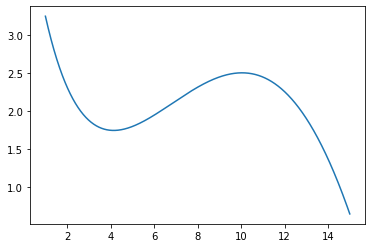

In [85]:
plt.plot(x,y)

1.Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

In [86]:
#{p * 1 + q = f(1)
#{p *15 + q = f(15)

In [87]:
a = np.array([[1, 1], [15, 1]]) 
b = np.array([f(1), f(15)])
coef1 = np.linalg.solve(a, b)
coef1

array([-0.18692825,  3.43914511])

In [88]:
def p1(x):
    return (coef1[0]*x+coef1[1])

In [89]:
z = np.array([p1(i) for i in x]) 

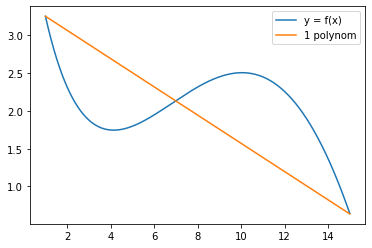

In [90]:
plt.plot(x,y)
plt.plot(x,z)
plt.legend(['y = f(x) ', '1 polynom'])

2.Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?

In [91]:
#{p * 1^2 + q * 1 + r = f(1)
#{p *15^2 + q * 15 + r = f(15)
#{p *8^2 + q * 8 + r = f(8)

In [92]:
a = np.array([[1, 1, 1], [15**2, 15, 1], [8**2, 8, 1]]) 
b = np.array([f(1), f(15), f(8)])
coef2 = np.linalg.solve(a, b)
coef2

array([-0.00760104, -0.06531159,  3.32512949])

In [93]:
def p2(x):
    return (coef2[0]*x**2 +coef2[1]*x+coef2[2])

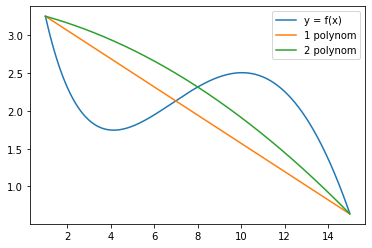

In [94]:
m = np.array([p2(i) for i in x]) 

plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,m)
plt.legend(['y = f(x) ', '1 polynom', '2 polynom'])

3.Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)

In [95]:
a = np.array([[1, 1, 1, 1], [4**3,4**2, 4, 1], [10**3,10**2, 10, 1], [15**3,15**2, 15, 1]]) 
b = np.array([f(1), f(4), f(10), f(15)])
coef3 = np.linalg.solve(a, b)
coef3

array([-0.00823565,  0.19333685, -1.29552587,  4.36264154])

In [96]:
def p3(x):
    return (coef3[0]*x**3+coef3[1]*x**2 +coef3[2]*x+coef3[3])

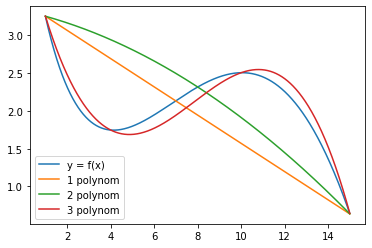

In [97]:
n = np.array([p3(i) for i in x]) 

plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,m)
plt.plot(x,n)
plt.legend(['y = f(x) ', '1 polynom', '2 polynom', '3 polynom'])

In [98]:
with open('submisson2.txt', 'w') as file:
    file = file.write(" ".join(str(c) for c in coef3[::-1]))